Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [24]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
print("hello")
# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

hello
<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


Smallest k-means inertia value: 924.3159961688092


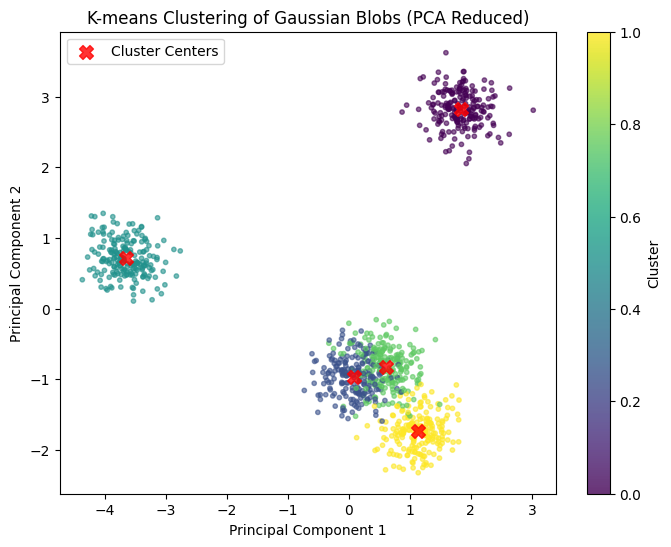

In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=1, n_init=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)

print(f"Smallest k-means inertia value: {kmeans.inertia_}")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, s=10, cmap='viridis', alpha=0.6)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=100, alpha=0.8, marker='X', label='Cluster Centers')
plt.title('K-means Clustering of Gaussian Blobs (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

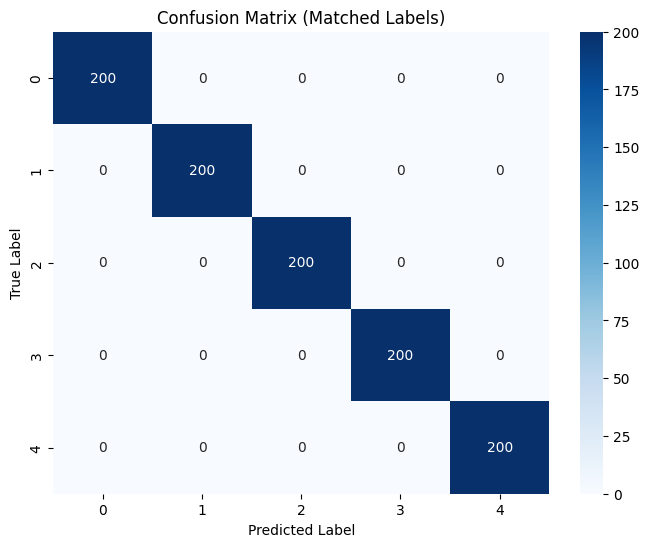

In [36]:
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_true, y_pred)

cm_fixed = cm.copy()
cm_fixed[0], cm_fixed[2], cm_fixed[3] = cm[2], cm[3], cm[0]


plt.figure(figsize=(8, 6))
sns.heatmap(cm_fixed, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Matched Labels)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [27]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


In [28]:
# your code here

# 3. Dimensionality reduction for Fashion-MNIST

In [29]:
# your code here

# 4. Clustering Fashion-MNIST using spectral clustering

In [30]:
# your code here